In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

dataset = pd.read_csv(r"datasets\function2.csv",delimiter=',')
X_dataset, Y_dataset = dataset["x"],dataset["y"]
range_min = math.floor(min(X_dataset))
range_max = math.ceil(max(X_dataset))

x_train = X_dataset[:math.floor(0.7*len(X_dataset))]
y_train = Y_dataset[:math.floor(0.7*len(X_dataset))]
x_valid = X_dataset[math.floor(0.7*len(X_dataset)):math.floor(0.8*len(X_dataset))]
y_valid = Y_dataset[math.floor(0.7*len(X_dataset)):math.floor(0.8*len(X_dataset))]
x_test = X_dataset[math.floor(0.8*len(X_dataset)):len(X_dataset)]
y_test = Y_dataset[math.floor(0.8*len(X_dataset)):len(X_dataset)]

training_size = [10,200]
M = [2,3,6,9]

In [6]:
def erms_error(D,N,x_train,y_train,lamda):
    I = np.identity(D)
    Phi = np.zeros((N,D))
    for i in range(N):
        for j in range(D):
            Phi[i][j] = x_train[i]**j

    w = np.linalg.inv(Phi.transpose().dot(Phi)+lamda*I).dot(Phi.transpose().dot(y_train))
             
    x = np.linspace(range_min,range_max,100)
    f_x = 0
    for i in range(len(w)):
        f_x += (x**i)*w[i]
    plt.plot(x,f_x, 'r')
    plt.scatter(x_train, y_train ,label=["train"])
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

    #for training data
    predicted = np.zeros(len(y_train))
    for i in range(len(y_train)):
        predicted[i] = 0
        for j in range(D):
            predicted[i] += (x_train[i]**j)*w[j]
    
    error_train = 0
    for i in range(len(y_train)):
        error_train += (predicted[i]-y_train[i])**2
    
    error_train /= len(y_train)
    
    #for validation data
    predicted = np.zeros(len(y_valid))
    for i in range(len(y_valid)):
        predicted[i] = 0
        for j in range(D):
            predicted[i] += (x_valid[i+math.floor(0.7*len(X_dataset))]**j)*w[j]
    
    error_valid = 0
    for i in range(len(y_valid)):
        error_valid += (predicted[i]-y_valid[i+math.floor(0.7*len(X_dataset))])**2
    
    error_valid /= len(y_valid)
    
    #For test data
    predicted = np.zeros(len(y_test))
    for i in range(len(y_test)):
        predicted[i] = 0
        for j in range(D):
            predicted[i] += (x_test[i+math.floor(0.8*len(X_dataset))]**j)*w[j]
            
    error_test = 0
    for i in range(len(y_test)):
        error_test += (predicted[i]-y_test[i+math.floor(0.8*len(X_dataset))])**2
    
    error_test /= len(y_test)
    return math.sqrt(error_train),math.sqrt(error_valid),math.sqrt(error_test)

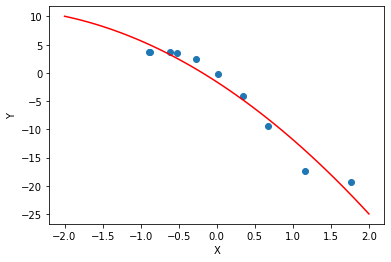

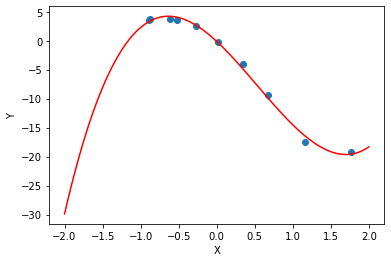

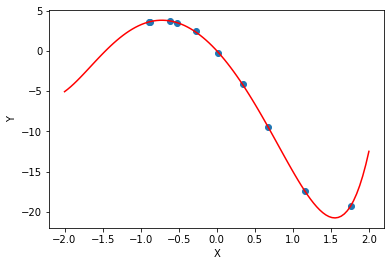

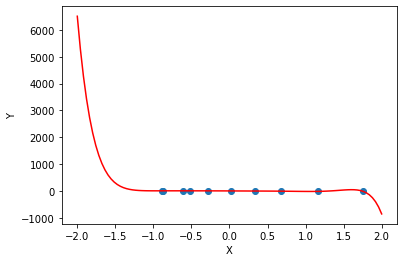

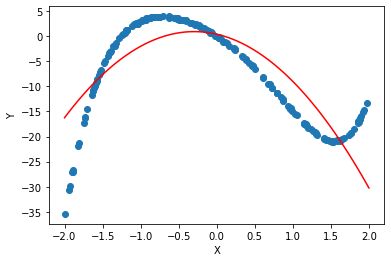

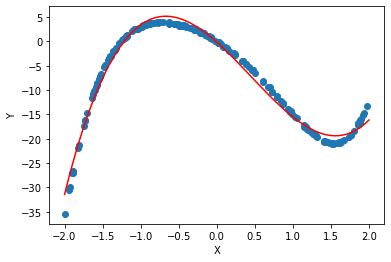

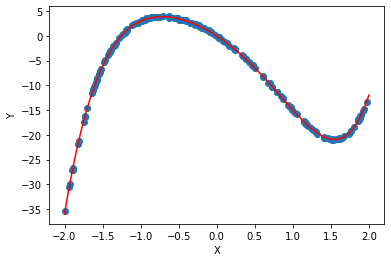

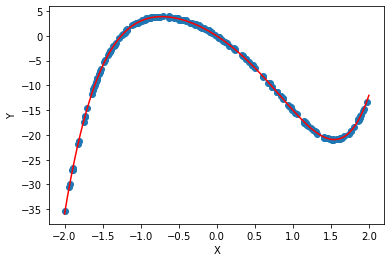

[[1.76109715e+00 5.08257655e-01 5.81189866e-02 8.66747271e-06]
 [5.20026720e+00 1.17041435e+00 9.23692781e-02 9.22020646e-02]]


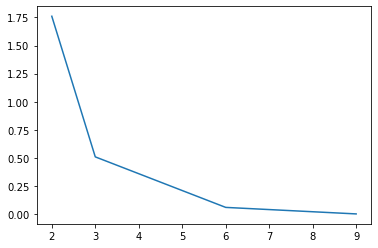

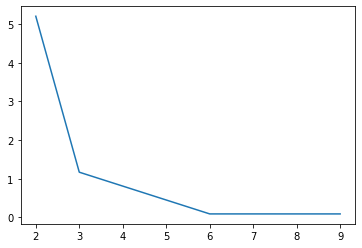

[[8.98286778e+00 1.24383610e+00 5.03902510e+00 8.43013971e+02]
 [4.78142328e+00 1.15199497e+00 9.72311087e-02 9.74882192e-02]]


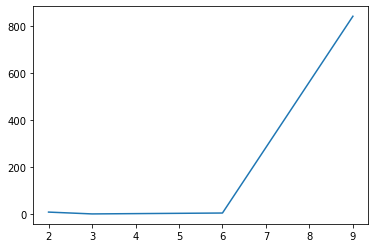

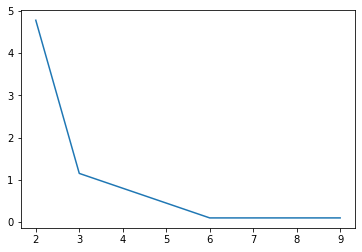

[[1.11838034e+01 1.39434909e+00 6.33528301e+00 1.01559300e+03]
 [5.44609259e+00 1.21109730e+00 1.08791120e-01 1.08923532e-01]]


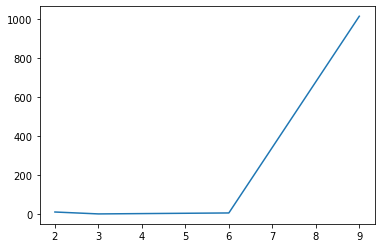

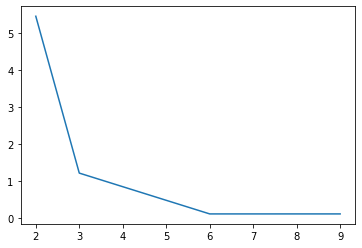

In [7]:
lamda = 0#10**(-6)
error_train = np.zeros((len(training_size),len(M)))
error_valid = np.zeros((len(training_size),len(M)))
error_test = np.zeros((len(training_size),len(M)))
for i in range(len(training_size)):
    x_training = x_train[:training_size[i]]
    y_training = y_train[:training_size[i]]
    for j in range(len(M)):
        error_train[i][j], error_valid[i][j], error_test[i][j] = erms_error(M[j]+1,training_size[i],x_training,y_training,lamda)

print(error_train)
for i in range(len(training_size)):    
    plt.plot(M,error_train[i])
    plt.show()
print(error_valid)
for i in range(len(training_size)):    
    plt.plot(M,error_valid[i])
    plt.show()
print(error_test)
for i in range(len(training_size)):    
    plt.plot(M,error_test[i])
    plt.show()